In [30]:
import numpy as np
import matplotlib.pyplot as plt
import z5py
from pathlib import Path

from cryofib.n5_utils import read_volume, print_key_tree, write_volume
from cryofib.data_loaders import load_platynereis_pred_n5

In [32]:
data_dir = Path("/scratch/buglakova/data/platynereis_em_membranes/membrane/masked_volumes")
n5_paths = list(data_dir.glob("*.n5"))
f_n5_list = [z5py.File(n5_path, "a") for n5_path in n5_paths]

In [5]:
f_n5_list

[<z5py.file.File at 0x7f8cadc89960>, <z5py.file.File at 0x7f8cadc893c0>]

In [35]:
idx = 1
roi = np.s_[:]
raw = read_volume(f_n5_list[idx], "volumes/raw/s1", roi)
segm = read_volume(f_n5_list[idx], "3dunet/labels", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume volumes/raw/s1 from /scratch/buglakova/data/platynereis_em_membranes/membrane/masked_volumes/train_data_membrane_02.n5
Read volume with shape (130, 628, 628), data type uint8
<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume 3dunet/labels from /scratch/buglakova/data/platynereis_em_membranes/membrane/masked_volumes/train_data_membrane_02.n5
Read volume with shape (3, 130, 628, 628), data type int64


In [36]:
segm.shape

(3, 130, 628, 628)

In [38]:
for idx in range(len(f_n5_list)):
    print(idx)
    segm = read_volume(f_n5_list[idx], "3dunet/labels", roi).astype(np.int64)
    segm[:, 0:50, :, :] = -1
    segm[:, 81:, :, :] = -1
    write_volume(f_n5_list[idx], segm, "3dunet/labels_masked", chunks=(1, 1, 512, 512))

0
<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume 3dunet/labels from /scratch/buglakova/data/platynereis_em_membranes/membrane/masked_volumes/train_data_membrane_01.n5
Read volume with shape (3, 130, 628, 628), data type int64
<class 'z5py.file.File'>
Created dataset 3dunet/labels_masked
Writing array to 3dunet/labels_masked
1
<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume 3dunet/labels from /scratch/buglakova/data/platynereis_em_membranes/membrane/masked_volumes/train_data_membrane_02.n5
Read volume with shape (3, 130, 628, 628), data type int64
<class 'z5py.file.File'>
Created dataset 3dunet/labels_masked
Writing array to 3dunet/labels_masked


In [ ]:
write_volume()

In [23]:
raw.shape

(130, 628, 628)

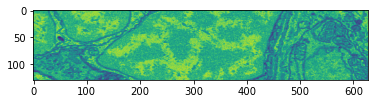

In [24]:
plt.imshow(raw[:, 300, :])

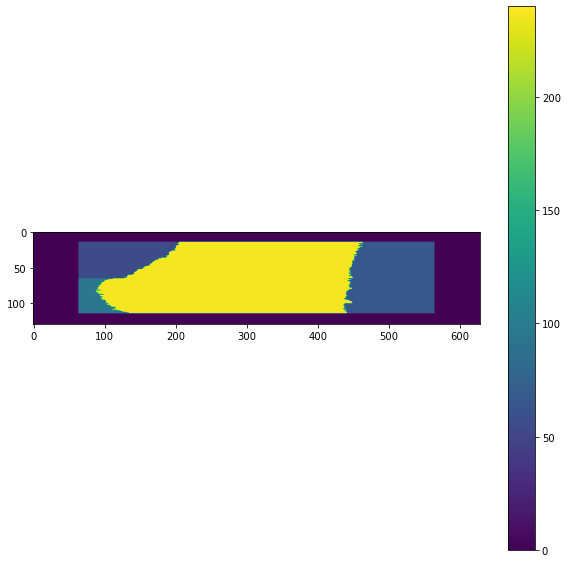

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(segm[:, 300, :])
plt.colorbar()

In [20]:
segm[0:50, :, :] = -1
segm[81:, :, :] = -1

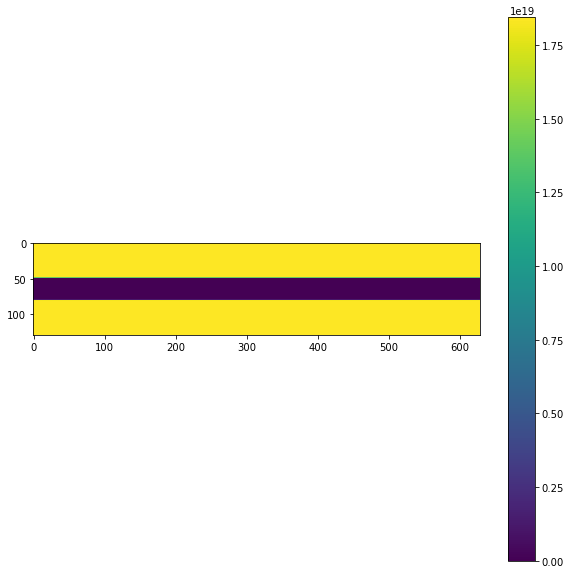

In [21]:
plt.figure(figsize=(10, 10))
plt.imshow(segm[:, 300, :])
plt.colorbar()